In [99]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
import random

In [100]:
np.random.seed(0)

In [101]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [102]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

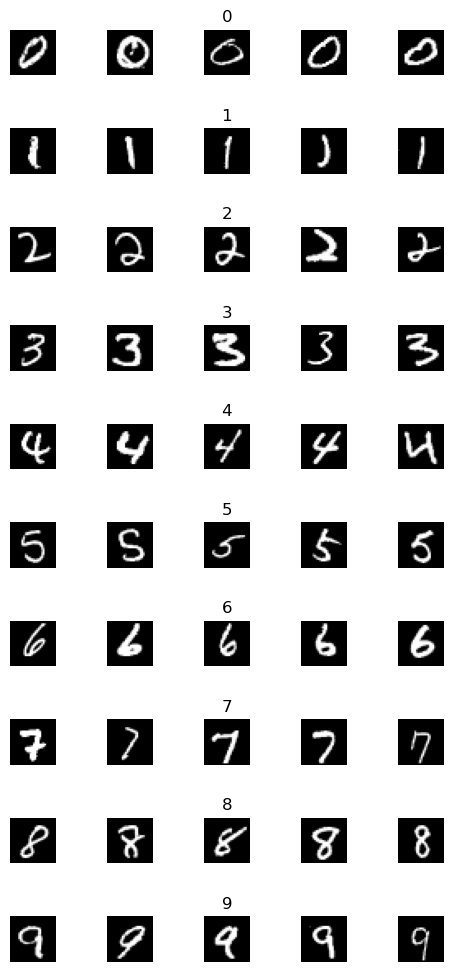

In [103]:
num_of_samples=[]

cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


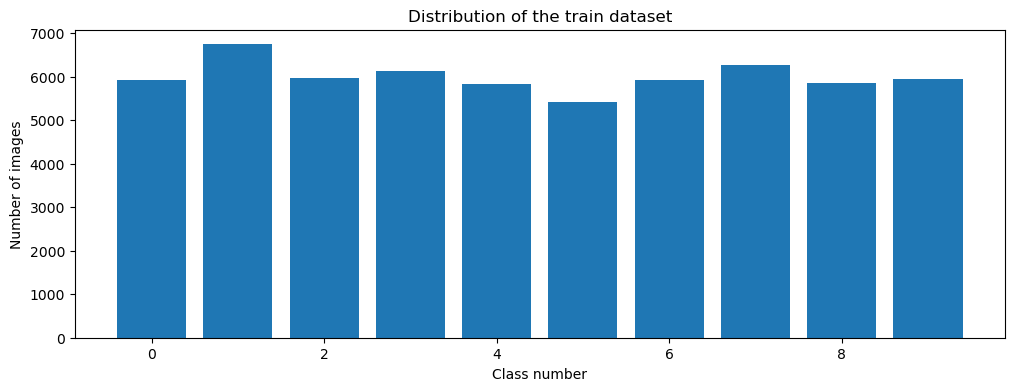

In [104]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [105]:
# previously flattened into 728 pixel now 28x28 with depth of 1 as is grayscale --> 1 channel of data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [106]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [107]:
# create CNN - LeNet based model (input layer, convolutional layer, pooling layer, convolutional layer, pooling layer, fully connected layer, output classifier) 
# define leNet model function
def leNet_model():
    model = Sequential()
    # number of filters in layer, tuple to define size of filter, shape of input data, activation function
    model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation='relu'))
    # pooling layer size
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten to get into 1-D array
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    # dropout layer added to reduce overfitting and ensure neurons work and learn independently through randomly 'turning off' nodes improving accuracy 
    # number of input nodes dropped out for every update
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [108]:
model = leNet_model()
print(model.summary())

c:\Users\44780\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [109]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8231 - loss: 0.5370 - val_accuracy: 0.9857 - val_loss: 0.0468
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9780 - loss: 0.0691 - val_accuracy: 0.9865 - val_loss: 0.0404
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9833 - loss: 0.0557 - val_accuracy: 0.9888 - val_loss: 0.0405
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9870 - loss: 0.0435 - val_accuracy: 0.9885 - val_loss: 0.0374
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9873 - loss: 0.0406 - val_accuracy: 0.9890 - val_loss: 0.0400
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9878 - loss: 0.0397 - val_accuracy: 0.9883 - val_loss: 0.0448
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9891 - loss: 0.0364 - val_accu

Text(0.5, 0, 'epoch')

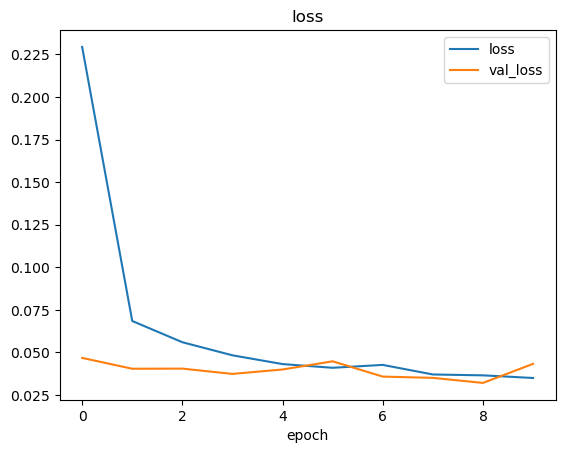

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

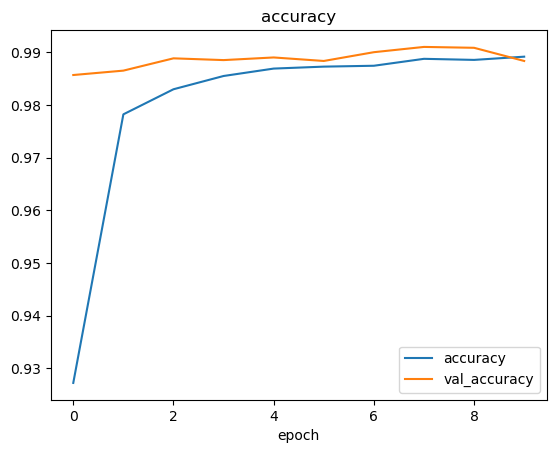

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

<Response [200]>


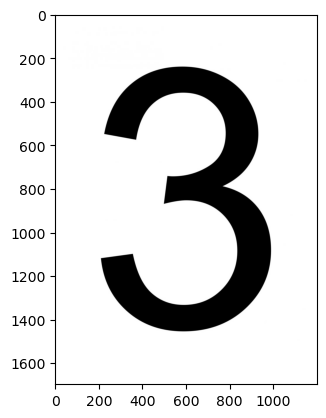

In [112]:
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

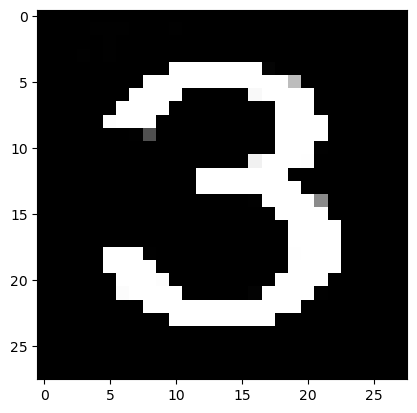

In [113]:
# reformat into 28x28 grayscale image using cv2 library
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# invert grayscale in line with training dataset
image = cv2.bitwise_not(grayscale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [114]:
# normalise input image
image = image/255
image = image.reshape(1, 28, 28, 1)

In [115]:
# obtain probabilities for each class
prediction = model.predict(image)
print("probabilities:", str(prediction))
# predict the class
predicted_class = prediction.argmax(axis=-1)
print("Predicted class:", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
probabilities: [[1.0951093e-31 8.1922322e-25 2.6576878e-20 1.0000000e+00 5.6600989e-36
  7.6715806e-20 8.7408174e-29 7.3186466e-22 3.6924168e-17 6.9270409e-22]]
Predicted class: 3


In [116]:
# evaluate the model accuracy and error/loss
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Score/Loss:", score[0])
print("Test Accuracy:", score[1])

Test Score/Loss: 0.03744356334209442
Test Accuracy: 0.9891999959945679


In [128]:
# obtain inputs and outputs of first convolutional layer
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
# obtain inputs and outputs of second convolutional layer
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


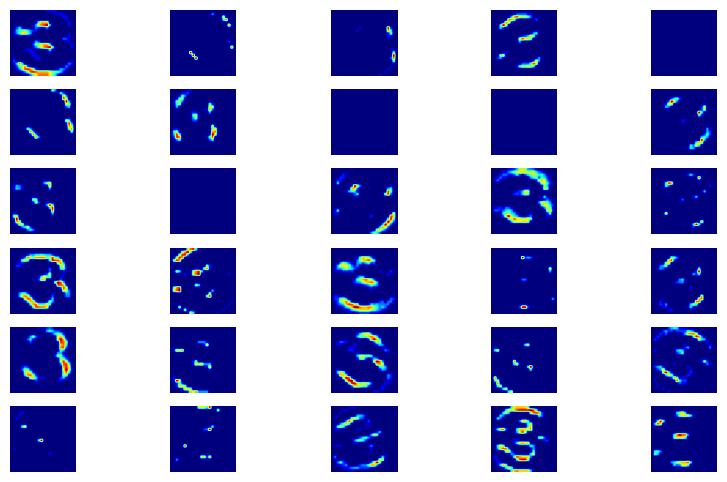

In [129]:
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

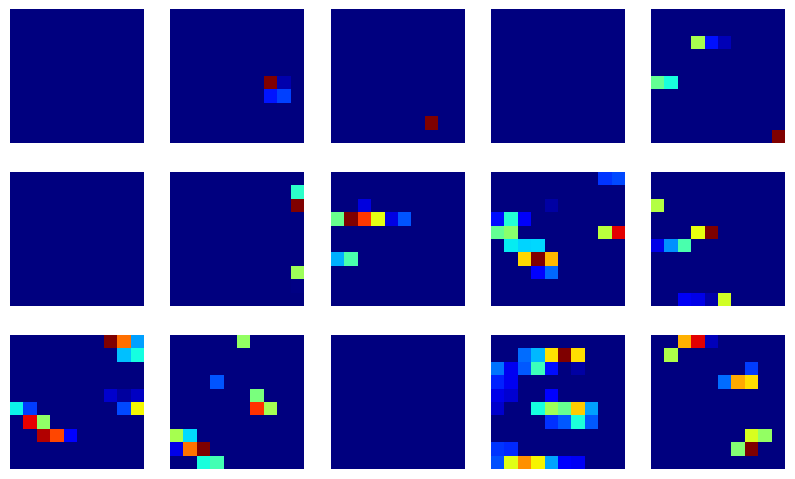

In [131]:
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')